In [25]:
# notebook to load an image pair from coregistration and compute coherence

import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
%matplotlib inline


# img1 = rasterio.open("/data/users/Public/jonathanbahlmann/spark_results/2021/06/21/7E17_9F0A_2_9/7E17_9F0A_2_9_Stack_deb.data/i_VV_slv1_21Jun2021.img")
# img2 = rasterio.open("/data/users/Public/jonathanbahlmann/spark_results/2021/07/03/35F7_9F0A_2_9/35F7_9F0A_2_9_Stack_deb.data/i_VV_slv1_03Jul2021.img")

# img1_ = img1.read(1)[0:100,0:100]
# img2_ = img2.read(1)[0:100,0:100]

#xr.DataArray((img1, img2), dims = ("x", "y", "t"))
img1_q = xr.open_rasterio("/data/users/Public/jonathanbahlmann/spark_results/2021/06/21/7E17_9F0A_2_9/7E17_9F0A_2_9_Stack_deb.data/q_VV_slv1_21Jun2021.img")
img1_i = xr.open_rasterio("/data/users/Public/jonathanbahlmann/spark_results/2021/06/21/7E17_9F0A_2_9/7E17_9F0A_2_9_Stack_deb.data/i_VV_slv1_21Jun2021.img")

img2_q = xr.open_rasterio("/data/users/Public/jonathanbahlmann/spark_results/2021/07/03/35F7_9F0A_2_9/35F7_9F0A_2_9_Stack_deb.data/q_VV_slv1_03Jul2021.img")
img2_i = xr.open_rasterio("/data/users/Public/jonathanbahlmann/spark_results/2021/07/03/35F7_9F0A_2_9/35F7_9F0A_2_9_Stack_deb.data/i_VV_slv1_03Jul2021.img")

#img = xr.concat([img1, img2], "t")
#img

#img1[0,200:300,200:300].plot(levels=[0,-.001,-.002,-.003,-.004])
#img1[:,28400:28800,300:700].plot() # .clip(min=-70,max=50).plot() # cant select these high indices with this method, must use .isel
#img1_q.isel(band=0, x=slice(28400,28800), y=slice(300,700)).plot(robust=True)
#img1_i.isel(band=0, x=slice(28400,28800), y=slice(300,700)).plot(robust=True)

#img1_q.assign_coords(band= "q")
#img1_q.coords["band"] = ["q"]
#img1_i.coords["band"] = ["i"]
#p#rint(img1_q)
#print(img1_i)
#img1 = xr.concat((img1_q, img1_i), dim = "band")
#img1.coords["band"] = ["q", "i"]
#img1

#img2_q = img2_q.isel(band=0, x=slice(28400,28800), y=slice(300,700))
#img2_i = img2_i.isel(band=0, x=slice(28400,28800), y=slice(300,700))":
img1_q = img1_q.isel(band=0, x=slice(28100,28800), y=slice(0,700))
img1_i = img1_i.isel(band=0, x=slice(28100,28800), y=slice(0,700))
img2_q = img2_q.isel(band=0, x=slice(28100,28800), y=slice(0,700))
img2_i = img2_i.isel(band=0, x=slice(28100,28800), y=slice(0,700))

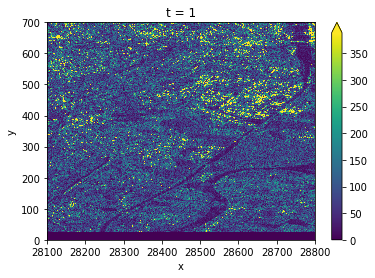

In [26]:
img1 = xr.concat([img1_q, img1_i], pd.Index(["q", "i"], name = "band"))
img2 = xr.concat([img2_q, img2_i], pd.Index(["q", "i"], name = "band"))
img = xr.concat([img1, img2], pd.Index([1, 2], name = "t"))
intensity1 = (img.sel(band="i", t=1) ** 2 + img.sel(band="q", t=1) ** 2) ** 0.5
# show intensity
intensity1.plot(robust=True)

In [31]:
# VV_q_coh = (IMG'i_VV',t=pair[0])]*IMG'i_VV',t=pair[1])]+IMG'q_VV',t=pair[0])]*IMG'q_VV',t=pair[1])]) / np.sqrt((IMG'i_VV',t=pair[0])]**2+IMG'q_VV',t=pair[0])]**2)*(IMG'i_VV',t=pair[1])]**2+IMG'q_VV',t=pair[1])]**2))
# VV_i_coh = (IMG'i_VV',t=pair[1])]*IMG'q_VV',t=pair[0])]-IMG'i_VV',t=pair[0])]*IMG'q_VV',t=pair[1])]) / np.sqrt((IMG'i_VV',t=pair[0])]**2+IMG'q_VV',t=pair[0])]**2)*(IMG'i_VV',t=pair[1])]**2+IMG'q_VV',t=pair[1])]**2))
q_coh = (img.sel(band="i", t=1) * img.sel(band="i", t=2) + img.sel(band="q", t=1) * img.sel(band="q", t=2)) / ((img.sel(band="i", t=1)**2 + img.sel(band="q", t=1)**2) * (img.sel(band="i", t=2)**2 + img.sel(band="q", t=2)**2))**0.5
i_coh = (img.sel(band="i", t=2) * img.sel(band="q", t=1) - img.sel(band="i", t=1) * img.sel(band="q", t=2)) / ((img.sel(band="i", t=1)**2 + img.sel(band="q", t=1)**2) * (img.sel(band="i", t=2)**2 + img.sel(band="q", t=2)**2))**0.5
# azimuth is flight direction, sentinel usually takes like 10:3 range:azimuth
# which means here: y = azimuth, x = range
q_coh_agg = q_coh.rolling(x=10).sum().rolling(y=3).sum()
q_coh_agg_mean = q_coh_agg / 30
i_coh_agg = i_coh.rolling(x=10).sum().rolling(y=3).sum()
i_coh_agg_mean = i_coh_agg / 30

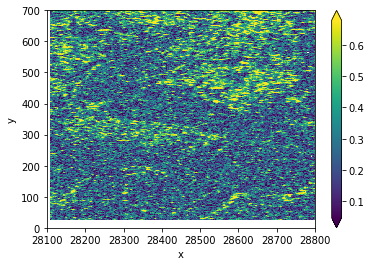

In [32]:
# intensity
coh_int = (i_coh_agg_mean**2 + q_coh_agg_mean**2)**0.5
coh_int.plot(robust=True)